<a href="https://colab.research.google.com/github/pytholabsbot1/Churn_modelling_with_ann_keras/blob/master/Churn_modelling1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

http://www.algosome.com/articles/dummy-variable-trap-regression.html

https://medium.com/coinmonks/building-your-own-artificial-neural-network-from-scratch-on-churn-modeling-dataset-using-keras-in-690782f7d051

https://github.com/pytholabsbot1/Churn_modelling_with_ann_keras

https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5


https://machinelearningmastery.com/save-load-keras-deep-learning-models/

https://www.kaggle.com/residentmario/l1-norms-versus-l2-norms

In [0]:
import numpy as np,sklearn,matplotlib.pyplot as plt,pandas as pd
from sklearn.metrics import confusion_matrix
from google.colab import files
import requests 

r = requests.get('https://raw.githubusercontent.com/pytholabsbot1/Churn_modelling_with_ann_keras/master/data.csv', stream=True)
with open('data.csv', 'wb') as f:
    for chunk in r.iter_content(chunk_size=1024): 
        if chunk: # filter out keep-alive new chunks
            f.write(chunk)


In [0]:
data = pd.read_csv('data.csv')

In [0]:
data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Left
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
print(data.shape)

(10000, 14)


In [0]:
X = data.iloc[:,3:13]

In [0]:
y = data.iloc[:,13] 

In [0]:
geo = pd.get_dummies(X['Geography']).iloc[:,1:]
gender = pd.get_dummies(X['Gender']).iloc[:,1:]

In [0]:
geo.append(gender)

,Germany,Male,Spain
0,0.0,NaN,0.0
1,0.0,NaN,1.0
2,0.0,NaN,0.0
3,0.0,NaN,0.0
4,0.0,NaN,1.0
5,0.0,NaN,1.0
6,0.0,NaN,0.0
7,1.0,NaN,0.0
8,0.0,NaN,0.0
9,0.0,NaN,0.0


In [0]:
s1 = pd.Series([2,3,4,7],index=[1,2,3,5])

In [0]:
s1

1    2
2    3
3    4
5    7
dtype: int64

In [0]:
s2 = pd.Series([6,7,89,68],index=[1,2,3,4])

In [0]:
s2

1     6
2     7
3    89
4    68
dtype: int64

In [0]:
d1 = pd.DataFrame({"one":s1,"two":s2,"two3":s2,"tw22o":s2})

In [0]:
d1

,one,tw22o,two,two3
1,2.0,6.0,6.0,6.0
2,3.0,7.0,7.0,7.0
3,4.0,89.0,89.0,89.0
4,NaN,68.0,68.0,68.0
5,7.0,NaN,NaN,NaN


In [0]:
result = pd.concat([geo, gender], axis=1)


del X["Geography"],X["Gender"]

X =  pd.concat([X,result], axis=1)

X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [0]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [0]:
X_train.shape

(8000, 11)

In [0]:
X_test.shape

(2000, 11)

# Designing the ANN

In [0]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json

# Initialising the ANN
churn_model = Sequential()


Using TensorFlow backend.


In [0]:
# Adding the input layer and the first hidden layer
##kernel initializer/init = uniform weights in all synapses

churn_model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))


In [0]:
# Adding Second hidden layer

churn_model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))


In [0]:
## Adding output layer

churn_model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


In [0]:
churn_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [0]:
# Fitting the ANN to the Training set
churn_model.fit(X_train, y_train, batch_size = 10, epochs = 100)

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")



Epoch 1/100
8000/8000 [==============================] - 1s 115us/step - loss: 0.4777 - acc: 0.7960
Epoch 2/100
8000/8000 [==============================] - 1s 97us/step - loss: 0.4275 - acc: 0.7960
Epoch 3/100
8000/8000 [==============================] - 1s 94us/step - loss: 0.4229 - acc: 0.8050
Epoch 4/100
8000/8000 [==============================] - 1s 90us/step - loss: 0.4192 - acc: 0.8217
Epoch 5/100
8000/8000 [==============================] - 1s 91us/step - loss: 0.4168 - acc: 0.8254
Epoch 6/100
8000/8000 [==============================] - 1s 90us/step - loss: 0.4152 - acc: 0.8276
Epoch 7/100
8000/8000 [==============================] - 1s 88us/step - loss: 0.4137 - acc: 0.8312
Epoch 8/100
8000/8000 [==============================] - 1s 90us/step - loss: 0.4122 - acc: 0.8309
Epoch 9/100
8000/8000 [==============================] - 1s 89us/step - loss: 0.4111 - acc: 0.8326
Epoch 10/100
8000/8000 [==============================] - 1s 90us/step - loss: 0.4101 - acc: 0.8316
Epoch 11

In [0]:
from sklearn.ensemble import RandomForestClassifier
# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=10)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)

In [0]:
y_pred = churn_model.predict(X_test)

In [0]:
y_ = y_pred >= 0.5

In [0]:
test = y_test.values.reshape(2000,1)
compared = y_==test

wrong = np.where(compared==False)[0]

(len(y_)-len(wrong))/len(y_)

0.843

In [0]:
y_pred.shape

(2000, 1)

In [0]:
y_test.shape

(2000,)

In [0]:
cm = confusion_matrix(y_test,y_)

In [0]:
cm

array([[1545,   50],
       [ 264,  141]])

In [0]:
(cm[0,0]+cm[1,1])/len(y_)

0.843

In [0]:
recall = lambda c: cm[0,0]/(cm[0,0]+cm[0,1])

In [0]:
prec = lambda c:cm[0,0]/(cm[0,0]+cm[1,0])

In [0]:
prec(cm)

0.8540630182421227

In [0]:
thresh_val = np.linspace(0,1,11)

In [0]:
r,p = [],[]

for i in thresh_val:
    y_ = y_pred >= i
    cm = confusion_matrix(y_test,y_)
    
    r.append(recall(cm))
    p.append(prec(cm))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in long_scalars
  """Entry point for launching an IPython kernel.


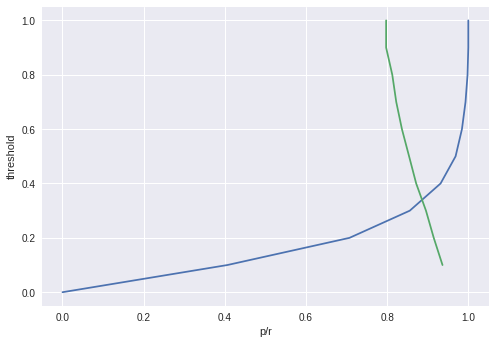

In [0]:
plt.ylabel('threshold')
plt.xlabel('p/r')

plt.plot(r,thresh_val)
plt.plot(p,thresh_val)

In [0]:
new_pred = y_pred >= 0.4

In [0]:
old_pred = y_pred >= 0.5

In [0]:
def acc(y_,y_test):

    compared = y_==test

    wrong = np.where(compared==False)[0]

    return((len(y_)-len(wrong))/len(y_))

In [0]:
acc(old_pred,y_pred)

0.843

In [0]:
acc(new_pred,y_pred)

0.836

In [0]:
from sklearn.metrics import roc_curve

y_pred_keras = churn_model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

In [0]:
yi = churn_model.predict(X_test)

In [0]:
np.argmax(tpr_keras)

481

In [0]:
tpr_keras[481],thresholds_keras[481]

(1.0, 0.007428426)

In [0]:
from sklearn.metrics import auc

In [0]:
auc_val = auc(fpr_keras,tpr_keras)

In [0]:
print(auc_val)

0.795882193583343


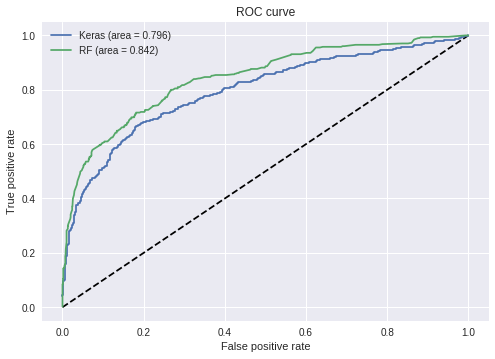

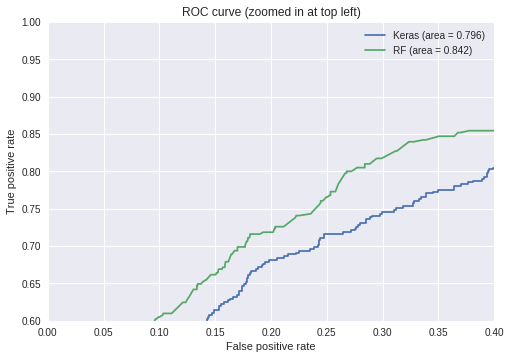

In [0]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_val))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.4)
plt.ylim(0.6, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_val))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

In [0]:
auc_rf

0.8421409497271566

Importing the dataset from github

In [0]:
from google.colab import files
files.upload()

In [0]:
files.download('data.csv')

MAking single predictions

In [0]:
# Predicting a single new observation
"""Predict if the customer with the following informations will leave the bank:
Geography: France
Credit Score: 600
Gender: Male
Age: 40
Tenure: 3
Balance: 60000
Number of Products: 2
Has Credit Card: Yes
Is Active Member: Yes
Estimated Salary: 50000"""

new_sample = np.array([[600,40,3,60000,2,1,1,50000,0,0,1]])

churn_model.predict(sc.transform(new_sample)) >= 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[False]])

In [0]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [0]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
